## EDA (Análisis Exploratorio de los Datos)

#### *El presente análisis tiene la finalidad de determinar el Modelo de Clasificación que mejor se ajuste a un Sistema de Recomendación de Películas por Similaridad.*




#### **Indice**
1. Introducción 
2. Estadística Descriptiva
3. Reducción de dimensionalidad
4. Agrupación de datos y tokenización
5. Nubes de Palabras de la variable objetivo
6. Outliers
7. Selección del modelo
8. Consideraciones finales

##### 1. Estadística Descriptiva

El Análisis Exploratorio de Datos (EDA) es una etapa crucial en cualquier proyecto de análisis de datos. Su objetivo principal es comprender y familiarizarse con los datos disponibles, identificar patrones, tendencias y relaciones entre las variables, y obtener información relevante que guíe el desarrollo del modelo de recomendación que se pretende construir.

En el contexto de este proyecto, el EDA permitirá explorar el conjunto de datos de películas con el fin de descubrir características importantes, comprender la distribución y variabilidad de los datos, y obtener conocimientos valiosos que ayuden a diseñar un sistema de recomendación efectivo.

*Los siguientes son los objetivos específicos del EDA para este proyecto*:

- Explorar las variables: El EDA permitirá examinar las variables disponibles en el dataset, incluyendo los títulos de las películas, la popularidad y otras variables relevantes. Analizaremos la naturaleza de estas variables, su clasificación y distribución inicial.

- Identificar patrones y tendencias: Mediante técnicas visuales como histogramas, gráficos de dispersión y gráficos de barras, se explorarán los patrones y tendencias presentes en los datos. Por ejemplo, podremos identificar las palabras más frecuentes en los títulos de las películas, la relación entre la popularidad y otros atributos, y posibles correlaciones entre variables.

- Detectar valores atípicos: Se supervisará la presencia de valores atípicos o anomalías en los datos. Estos valores pueden afectar el rendimiento y la precisión del modelo de recomendación, por lo que es importante detectarlos y considerar si es necesario realizar algún tratamiento o ajuste.

- Evaluar la calidad de los datos: En esta etapa, también evaluaremos la calidad de los datos, revisando la presencia de valores nulos, datos faltantes o inconsistentes. Si es necesario, se realizarán tareas de limpieza y preprocesamiento de los datos y así asegurar que estén listos para ser utilizados en el modelo de recomendación.

En resumen, el *Análisis Exploratorio de Datos (EDA)* desempeña un papel fundamental en este proyecto de sistema de recomendación de películas. A través del EDA, buscamos comprender los datos disponibles, identificar patrones y tendencias, detectar valores atípicos y evaluar la calidad de los datos. Estos conocimientos nos permitirán tomar decisiones informadas durante el desarrollo del modelo de recomendación y asegurar que nuestro sistema sea efectivo y preciso.

##### 2. Estadística Descriptiva

In [59]:
# Se importan bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crest\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Se importa el dataset a analizar (previamente transformado)
df = pd.read_csv('movies_dataset_clean.csv')

In [61]:
# Se observa la cantidad de registros y columnas en el dataset
print("Número de registros:", len(df))
print("Número de columnas:", len(df.columns))

Número de registros: 45451
Número de columnas: 21


In [62]:
# Se verifica la información de tipos de datos en el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 45451 non-null  int64  
 2   genres                 45451 non-null  object 
 3   id                     45451 non-null  int64  
 4   original_language      45440 non-null  object 
 5   overview               44510 non-null  object 
 6   popularity             45451 non-null  float64
 7   production_companies   45451 non-null  object 
 8   production_countries   45451 non-null  object 
 9   release_date           45451 non-null  object 
 10  revenue                45451 non-null  float64
 11  runtime                45205 non-null  float64
 12  spoken_languages       45451 non-null  object 
 13  status                 45371 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

Como se puede observar, las columnas *'belongs_to_collection'* y *'tagline'* son las que contienen la mayor proporción de datos nulos.

##### Matriz de correlación

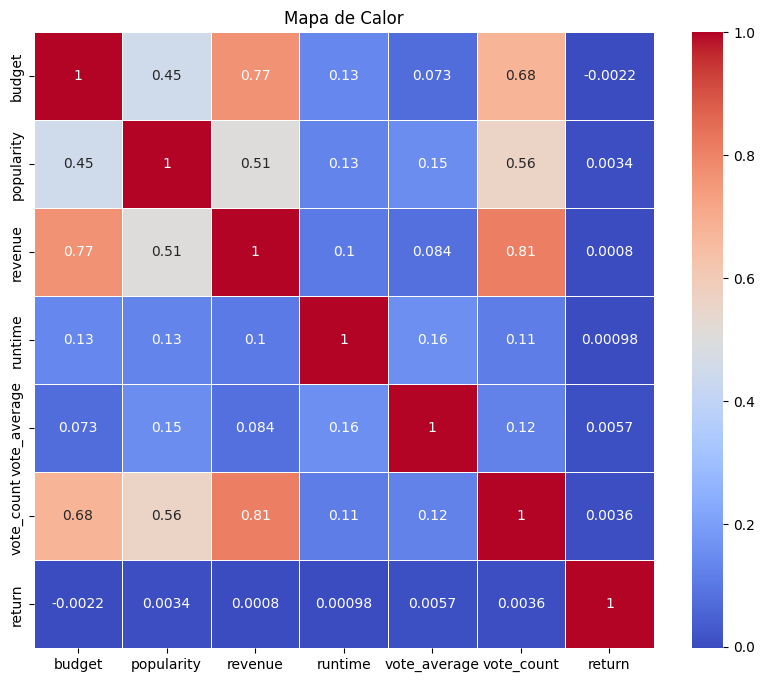

In [63]:
# Seleccionar las columnas numéricas
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']

# Crear una subselección del DataFrame
df_numeric = df[numeric_columns]

# Calcular la matriz
correlation_matrix = df_numeric.corr()

# Visualización  mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor')
plt.show()


Como se puede apreciar, la mayor correlación ocurre entre *'revenue'* y *'vote_average'*, lo que sugiere que cuanto mejor sea el performance de una película respecto a los votos, mayor será la recaudación de las mismas. 
También se observa una alta correlación entre *'budget'* y *'revenue'*, implicando que las películas con mayor recaudación son las que cuentan con más presupuesto.

##### Tendencias del *'revenue'* (remuneración) en función del tiempo

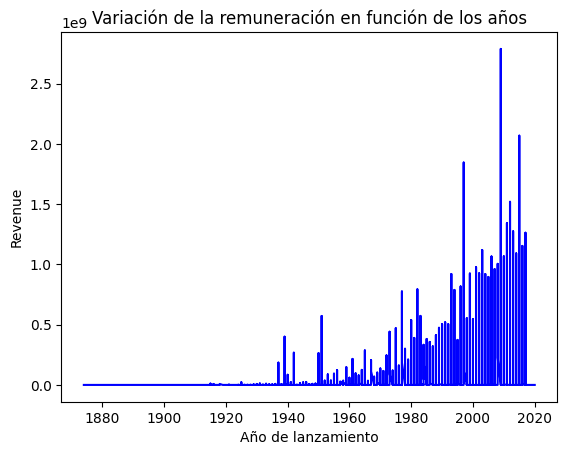

In [64]:

# Ordenar DataFrame según año de lanzamiento (release_year)
df_sorted = df.sort_values('release_year')

# Gráfico de barra revenue vs año de lanzamiento
plt.plot(df_sorted['release_year'], df_sorted['revenue'], color='blue')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Revenue')
plt.title('Variación de la remuneración en función de los años')
plt.show()


Se puede observar una notable tendencia a recaudar mayores volumenes de dinero a lo largo de los años por parte de la industria cinematográfica.

##### Medidas de Tendencia Central de variables numéricas

In [65]:
df.describe(include=[np.number])

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.545100e+04,45451.000000,45451.000000,4.545100e+04,45205.000000,45451.000000,45451.000000,45451.000000,45451.0
mean,4.231294e+06,107984.599745,2.926887,1.121930e+07,94.181905,5.624085,109.989703,1991.882027,inf
std,1.742942e+07,112111.336735,6.006458,6.433984e+07,38.329504,1.915424,491.352336,24.057726,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.0
25%,0.000000e+00,26367.500000,0.389095,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.0
50%,0.000000e+00,59871.000000,1.131386,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.0
75%,0.000000e+00,156327.500000,3.694370,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.0
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf


##### Análisis de las variables categóricas

In [66]:
df.describe(include=object)

,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,director
count,4497,45451,45440,44510,45451,45451,45451,45451,45371,20425,45451,45451
unique,1695,4065,89,44231,22703,2389,17333,1931,6,20269,42195,18830
top,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...","[{'id': 18, 'name': 'Drama'}]",en,No overview found.,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Which one is the first to return - memory or t...,Blackout,[]
freq,29,5006,32249,133,11817,17868,136,22410,45009,9,13,835


##### 3. Reducción de Dimensionalidad

Reducción Vertical:

A) Criterio de eliminación por ratio de valores perdidos:

In [67]:
# Obtener proporción de valores faltantes en cada variable
missing_ratio = df.isnull().mean()

# Establecer umbral de 0.02 (2%)
threshold = 0.02

# Variables con proporción de valores faltantes superior al umbral
variables_to_drop = missing_ratio[missing_ratio > threshold].index

# Eliminar variables identificadas
df.drop(columns=variables_to_drop, inplace=True)


In [68]:
print(variables_to_drop)

Index(['belongs_to_collection', 'overview', 'tagline'], dtype='object')


B) Criterio de eliminación por el tipo de información que aporta:
- Las variables no aportan información acerca de la naturaleza del contenido de cada película
- Las variables no explican la similaridad de contenido entre las películas

In [69]:
df = df.drop('budget', axis = 1)
df = df.drop('production_countries', axis = 1)
df = df.drop('revenue', axis = 1)
df = df.drop('release_year', axis = 1)
df = df.drop('runtime', axis = 1)
df = df.drop('spoken_languages', axis = 1)
df = df.drop('release_date', axis = 1)
df = df.drop('return', axis =1)

*Reducción Vertical por Correlación*

Se aplica reducción vertical por correlación a las variables numéricas 'popularity', 'vote_average' y 'vote_count', con el objetivo de conservar una sola.


In [70]:
# Se crea un subconjunto del dataframe original que contiene solo las variables de interés:
variables = ['popularity', 'vote_average', 'vote_count']
df_selected = df[variables]
# Se calcula la matriz de correlación para su posterior evaluación
correlation_matrix = df_selected.corr()
print(correlation_matrix)

              popularity  vote_average  vote_count
popularity      1.000000      0.153814    0.559846
vote_average    0.153814      1.000000    0.123556
vote_count      0.559846      0.123556    1.000000


En base a los resultados, se observa que *'popularity'* tiene una correlación más fuerte con *'vote_count'* en comparación con *'vote_average'* (y la correlación entre las últimas dos no es significativa). Por lo tanto, se decide conservar la variable 'popularity' debido a que está relacionada con la cantidad de vistas de las películas. Además, las variables provenientes de votaciones tienen el potencial para cargar con cierto sesgo, relacionado con la naturaleza de la recolección de los datos.

In [71]:
# Se eliminan las variables 'vote_average' y 'vote_count' del dataframe original:
df = df.drop('vote_average', axis=1)
df = df.drop('vote_count', axis=1)

Reducción Horizontal:

In [72]:
# Eliminar duplicados en la columna 'title'
df = df.drop_duplicates(subset='title', keep='first')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42195 entries, 0 to 45450
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                42195 non-null  object 
 1   id                    42195 non-null  int64  
 2   original_language     42184 non-null  object 
 3   popularity            42195 non-null  float64
 4   production_companies  42195 non-null  object 
 5   status                42120 non-null  object 
 6   title                 42195 non-null  object 
 7   director              42195 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.9+ MB


##### 4. Grouping y Tokenización

En la sección de agrupación y tokenización de nuestro proyecto, utilizaremos técnicas que nos permitirán obtener información relevante para nuestro sistema de recomendación de películas. 
Una de las técnicas que utilizaremos es la creación de una nube de palabras, que nos dará una idea de las palabras más frecuentes en los títulos de las películas. Esta visualización nos ayudará a identificar temas o conceptos clave presentes en los títulos, lo cual es valioso para nuestro sistema de recomendación.

Palabra: , Frecuencia: 109
Palabra: love, Frecuencia: 30
Palabra: man, Frecuencia: 15
Palabra: life, Frecuencia: 14
Palabra: way, Frecuencia: 10
Palabra: night, Frecuencia: 10
Palabra: one, Frecuencia: 9
Palabra: time, Frecuencia: 9
Palabra: day, Frecuencia: 9
Palabra: go, Frecuencia: 8


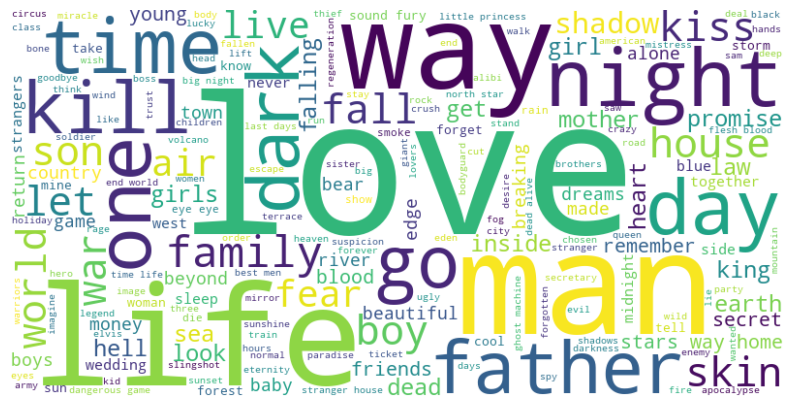

In [74]:
# Obtener títulos de las películas
titles = df['title'].tolist()

# Limpiar títulos y eliminar stopwords
cleaned_titles = []
stopwords_list = set(stopwords.words('english'))  # Lista de stopwords en inglés

for title in titles:
    words = title.lower().split()  # Convertir a minúsculas y dividir en palabras
    cleaned_words = [word for word in words if word not in stopwords_list]
    cleaned_title = ' '.join(cleaned_words)  # Unir las palabras nuevamente
    cleaned_titles.append(cleaned_title)

# Generar frecuencia de palabras
word_freq = Counter(cleaned_titles)

# Imprimir primeros puestos del contador de palabras
top_words = word_freq.most_common(10)  # Obtener 10 primeros puestos
for word, freq in top_words:
    print(f'Palabra: {word}, Frecuencia: {freq}')

# Crear nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Visualizar nube
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



##### 6. Outliers

La única variable numérica que está siendo procesada es *'popularity'*. A continuación se observa su comportamiento con la ayuda de un histograma y un diagrama de dispersión.

In [8]:
df['popularity'].describe()

count    45451.000000
mean         2.926887
std          6.006458
min          0.000000
25%          0.389095
50%          1.131386
75%          3.694370
max        547.488298
Name: popularity, dtype: float64

Se procede a construir un gráfico de dispersion, a fines de observar la presencia de datos que representen potenciales 'Outliers'.

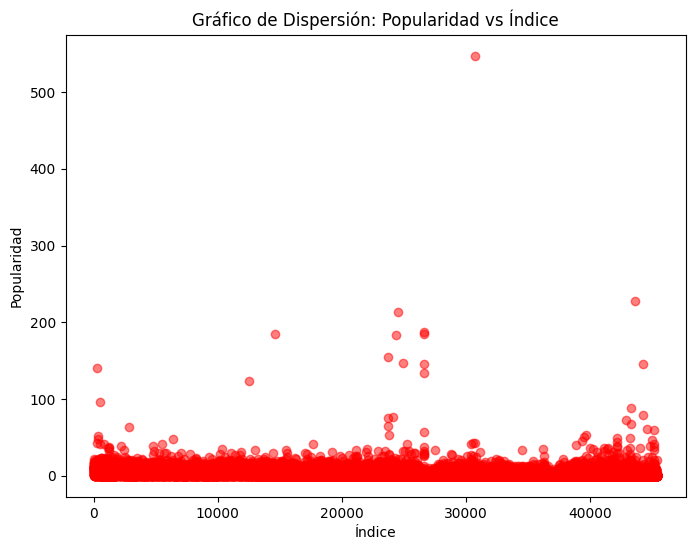

In [80]:
# Gráfico de dispersión variable popularidad vs índice en DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['popularity'], color='red', alpha=0.5)
plt.xlabel('Índice')
plt.ylabel('Popularidad')
plt.title('Gráfico de Dispersión: Popularidad vs Índice')
plt.show()


Se observa claramente la presencia de 'Outliers'. A continuación, se procede a identificarlos y tratarlos:

In [81]:
# Calcular rango intercuartílico (IQR)
Q1 = df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['popularity'] < lower_limit) | (df['popularity'] > upper_limit)]

# Reemplazar los outliers con valores extremos por el valor más cercano dentro del rango
df['popularity'] = np.where(df['popularity'] < lower_limit, lower_limit, df['popularity'])
df['popularity'] = np.where(df['popularity'] > upper_limit, upper_limit, df['popularity'])


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42195 entries, 0 to 45450
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                42195 non-null  object 
 1   id                    42195 non-null  int64  
 2   original_language     42184 non-null  object 
 3   popularity            42195 non-null  float64
 4   production_companies  42195 non-null  object 
 5   status                42120 non-null  object 
 6   title                 42195 non-null  object 
 7   director              42195 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.9+ MB


##### 7. Selección del Modelo


Para el sistema de recomendación de películas, hay varios modelos de machine learning (ML) que podrían considerarse, teniendo en cuenta las siguientes variables: 'popularity' y 'title'.

Entre las opciones más populares se encuentran:

*Fuerza bruta o basado en reglas*: Podrías implementar un enfoque simple basado en reglas o fuerza bruta. Por ejemplo, podrías buscar coincidencias exactas o similares en los títulos de las películas y recomendar aquellas que sean más cercanas.

*Bag of Words (BoW) y TF-IDF*: Se pueden utilizar técnicas de procesamiento de lenguaje natural como el modelo de bolsa de palabras (Bag of Words) o TF-IDF para representar el texto del título de las películas como características numéricas y luego aplicar algoritmos de clasificación o recomendación como Similitud del coseno, Naive Bayes, Árboles de Decisión, K-Nearest Neighbors (KNN) o Support Vector Machines (SVM).

*Word Embeddings*: Se pueden utilizar modelos de word embeddings pre-entrenados, como Word2Vec, GloVe o FastText, para representar los títulos de las películas en un espacio semántico y luego aplicar algoritmos de clasificación o recomendación como KNN, clustering o modelos de aprendizaje profundo.

*Aprendizaje profundo*: Se pueden utilizar modelos de aprendizaje profundo como redes neuronales convolucionales (CNN) o redes neuronales recurrentes (RNN), como LSTM o GRU, para aprender representaciones más complejas de los títulos de las películas y generar recomendaciones basadas en estas representaciones.

*Modelos de recomendación basados en contenido*: Se pueden utilizar enfoques de filtrado colaborativo o sistemas de recomendación basados en contenido. Por ejemplo, podrías construir un perfil de película para cada usuario basado en los títulos de las películas que ha visto y luego recomendar películas similares en función de la similitud entre los perfiles.

**Tres posibles escenarios:**

- Escenario Eficiente:
En este escenario, se podrían utilizar modelos como KNN o Gráfico de Palabras. La técnica Bag of Words (BoW) permitiría determinar la asociación más cercana dentro de un conjunto de palabras, en este caso asociadas a una combinación entre el título de las películas y las palabras de las reseñas.

- Escenario Efectivo:
En este escenario, se podrían utilizar los Vectores del Coseno utilizando las variables 'popularity' y 'title'. Este enfoque es efectivo ya que aprovecha tanto la información textual como la numérica de las películas. Utilizar las características de texto permite capturar el contenido y el contexto de las películas, mientras que la característica numérica (popularidad) puede influir en las recomendaciones basadas en preferencias populares.

- Escenario Complejo:
En este escenario, se podría utilizar una Red Neuronal Convolucional (CNN) combinando las columnas "title" y "popularity" para crear una representación combinada de texto y características numéricas. Estas representaciones podrían ser procesadas utilizando capas convolucionales y capas densas para clasificar los datos. Además, se podrían aplicar técnicas de validación estándar para evaluar y ajustar el modelo.

In [91]:
# Preprocesamiento del dataset para el modelo de clasificación 'ds_model.csv'
df = df.drop('genres', axis =1)
df = df.drop('id', axis =1)
df = df.drop('original_language', axis =1)
df = df.drop('status', axis =1)
df = df.drop('director', axis =1)
df.info()

# Exportamos el dataset "ds_model.csv" para luego ser consumido por el modelo de clasificación.
df.to_csv('dataset_model.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 42195 entries, 0 to 45450
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   popularity  42195 non-null  float64
 1   title       42195 non-null  object 
dtypes: float64(1), object(1)
memory usage: 988.9+ KB


##### 8. Consideraciones finales

Luego de analizar los datos disponibles en función a los objetivos del proyecto, Se concluye que la mejor opción para desarrollar un sistema de recomendación de películas es emplear la técnica de Bolsa de Palabras (BoW) junto con la Similitud del Coseno.

Las siguientes consideraciones respaldan dicha elección:

*Naturaleza de los datos*: El dataset transformado y reducido consiste principalmente en títulos de películas y una variable numérica de popularidad. Al utilizar BoW, se aprovecha la información textual de los títulos de las películas para capturar su contenido y contexto. Además, al considerar la popularidad, se tienen en cuenta las preferencias populares al generar las recomendaciones.

*Representación de características*: BoW permite representar los títulos de las películas como características numéricas, lo que facilita su procesamiento y aplicación de algoritmos de clasificación o recomendación. Al utilizar la técnica de Similitud del Coseno, se puede medir la similitud entre los vectores de características de las películas y encontrar las más cercanas en términos de palabras clave.

*Flexibilidad y escalabilidad*: BoW y la Similitud del Coseno son enfoques flexibles y escalables que pueden adaptarse a conjuntos de datos de diferentes tamaños. Es factible ajustar la cantidad de palabras consideradas en el modelo según las necesidades y recursos disponibles.

*Interpretación de resultados*: Al obtener recomendaciones de películas basadas en la similitud de palabras clave en los títulos. Es más sencillo comprender el motivo detrás de las recomendaciones y explicarlas a los usuarios de manera más intuitiva.

En resumen, la combinación de BoW y la Similitud del Coseno es la mejor opción para este proyecto de sistema de recomendación de películas. Esta técnica permite aprovechar la información textual de los títulos de las películas, considerar la popularidad como factor de influencia y obtener recomendaciones precisas basadas en la similitud de palabras clave.